In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import scipy
import uncertainties as uc

from sklearn.metrics import r2_score

In [2]:
def list_hdf5_files(start_path):
    hdf5_files = []
    for root, dirs, files in os.walk(start_path):
        for file in files:
            if file.endswith('.hdf5'):
                hdf5_files.append(os.path.join(root, file))
    return hdf5_files

def lorentzian(x, A, kappa, omega_r, c):
    return A * (kappa/2)**2/((x - omega_r)**2 + (kappa/2)**2) + c

# Frequency Sweep

In [3]:
data_dir = "frequency sweep cavity"
DATA_ROOT = "data"

path = os.path.join(DATA_ROOT, data_dir)

hdf5_files = list_hdf5_files(path)
hdf5_files

['data\\frequency sweep cavity\\110717_broad-res-spec_qb1\\110717_broad-res-spec_qb1.hdf5',
 'data\\frequency sweep cavity\\174703_broad-res-spec_qb1\\174703_broad-res-spec_qb1.hdf5',
 'data\\frequency sweep cavity\\181421_broad-res-spec_qb1\\181421_broad-res-spec_qb1.hdf5']

In [4]:
f = h5py.File(hdf5_files[1])
data = np.array(list(f["Experimental Data"]["Data"]))
freq = np.array(list(f["Experimental Data"]["Experimental Metadata"]["task_list"]["list_idx_0"]["freqs"])) * 1e-9

In [5]:
freq[1] - freq[0]

0.10000000000000009

In [6]:
len(freq)

80

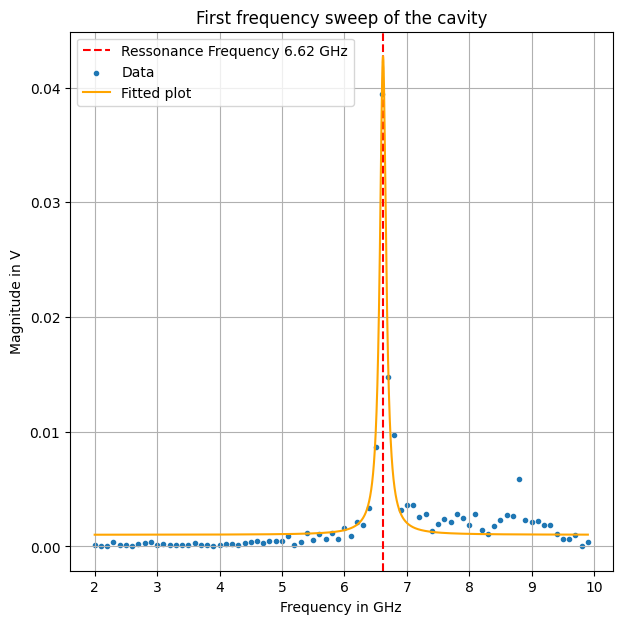

In [7]:
y = np.abs(data[:,2] + 1j * data[:,3]) 
x = np.linspace(np.min(freq), np.max(freq), 10000)

params, std_dev = scipy.optimize.curve_fit(lorentzian, freq, y, [0.02, 1, 6.6, 0])

plt.figure(figsize=(7, 7))
plt.title("First frequency sweep of the cavity")
plt.axvline(params[2], linestyle="--", label=f"Ressonance Frequency {np.round(params[2], 2)} GHz", color="red")
plt.scatter(freq, y, label="Data", marker=".")
plt.plot(x, lorentzian(x, params[0], params[1], params[2], params[3]), label="Fitted plot", color="orange")
plt.xlabel("Frequency in GHz")
plt.ylabel("Magnitude in V")
plt.grid()
plt.legend()
plt.savefig("rsc/freq_sweep_1.pdf", bbox_inches="tight")

In [8]:
omega_std_dev = np.diag(std_dev)[2]
print(f"{uc.ufloat(params[2], np.sqrt(omega_std_dev)):L}")

6.619 \pm 0.005


In [9]:
r2_score(y, lorentzian(freq, params[0], params[1], params[2], params[3]))

0.9410874023040333

In [10]:
f = h5py.File(hdf5_files[2])
data = np.array(list(f["Experimental Data"]["Data"]))
freq = np.array(list(f["Experimental Data"]["Experimental Metadata"]["task_list"]["list_idx_0"]["freqs"])) * 1e-9

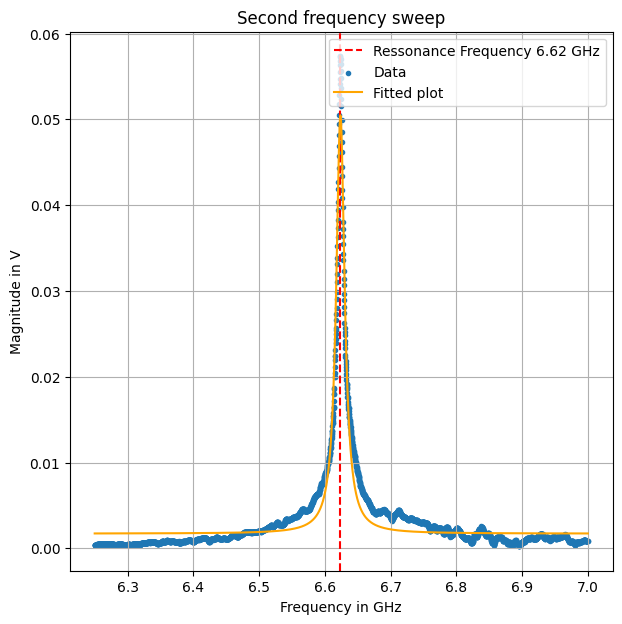

In [11]:
y = np.abs(data[:,2] + 1j * data[:,3]) 

params, std_dev = scipy.optimize.curve_fit(lorentzian, freq, y, [0.06, 1, 6.6, 0.01])

plt.figure(figsize=(7, 7))
plt.axvline(params[2], linestyle="--", label=f"Ressonance Frequency {np.round(params[2], 2)} GHz", color="red")
plt.scatter(freq[::20], y[::20], label="Data", marker=".")
plt.plot(freq, lorentzian(freq, params[0], params[1], params[2], params[3]), label="Fitted plot", color="orange")
plt.xlabel("Frequency in GHz")
plt.title("Second frequency sweep")
plt.ylabel("Magnitude in V")
plt.grid()
plt.legend()

plt.savefig("rsc/freq_sweep_2.pdf", bbox_inches="tight")

In [12]:
omega_std_dev = np.diag(std_dev)[2]
print(f"{uc.ufloat(params[2], np.sqrt(omega_std_dev)):L}")

6.623699 \pm 0.000009


In [13]:
r2_score(y, lorentzian(freq, params[0], params[1], params[2], params[3]))

0.9521260331228675

In [14]:
freq[1] - freq[0]

1.0000000000509601e-05